# Lab 2
Le domaine spatiale

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from scipy import signal
import random

## Exercice 1
Créer un filtre 5x5 linéaire avec les distances Tchebychev à partir du centre.

<img src="distance tchebychev.PNG"
     alt="Error can't fetch img"
     style="float: left" />
     
> Défi: À l'aide de numpy,  
> faite le en moins de 4 lignes

> Indices:  
> \- `np.full()`  
> \- `np.ones()`  
> \- `np.zeros()`  
> \- les *slices*

[[2 2 2 2 2]
 [2 1 1 1 1]
 [2 1 0 1 1]
 [2 1 1 1 1]
 [2 1 1 1 1]]
[[2 2 2 2 2]
 [2 1 1 1 2]
 [2 1 0 1 2]
 [2 1 1 1 2]
 [2 2 2 2 2]]


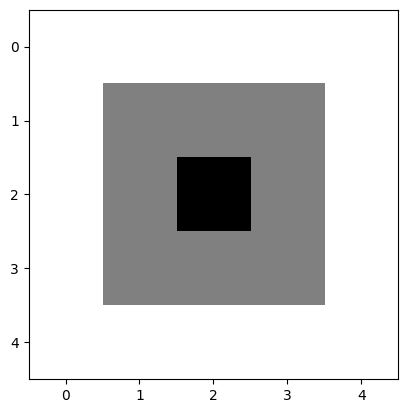

In [2]:
tchebychev = np.array([
    [2,2,2,2,2], [2,1,1,1,2], [2,1,0,1,2], [2,1,1,1,2], [2,2,2,2,2]])

array =np.full((5,5), 2)
array[1:, 1:] = array[1:,1:] - np.ones((4,4))
array[2,2] = 0

print(array)

print(tchebychev)

plt.imshow(tchebychev, cmap="grey")
plt.show()

## Exercice 2
Créer un histogramme des intensités dans le filtre au premier exercice.
> Utiliser `ndarray.flatten()` et `plt.hist()`

> Défi: Ajouter un titre et des *labels* sur les axes.

## 

[2 2 2 2 2 2 1 1 1 2 2 1 0 1 2 2 1 1 1 2 2 2 2 2 2]


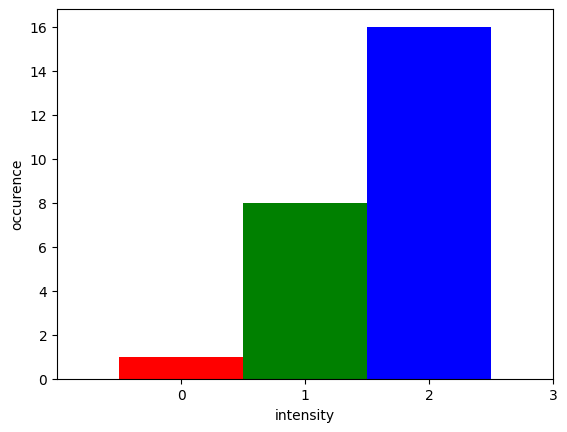

In [3]:
tchebychev_hist = tchebychev.flatten()

COLORS = ['r', 'g', 'b']

print(tchebychev_hist)
bins = np.arange(4) - 0.5

_,_, patches = plt.hist(tchebychev_hist, bins)
for patch, i in zip(patches, range(0,3)):
    patch.set_facecolor(COLORS[i])
    
plt.xlabel('intensity')
plt.xticks([0,1,2,3])
plt.xlim([-1, 3])
plt.ylabel('occurence')
plt.show()

## Exercice 3
Créer un filtre linéaire 5x5 avec les distances Euclidienne à partir du centre.

<img src="distance euclidienne.PNG"
     alt="Error can't fetch img"
     style="float: left" />

In [4]:
eucli = np.zeros((5,5))
center = (2,2)
for row,i in zip(eucli, range(0,5)): 
    for element,j in zip(row, range(0,5)): 
        distance = np.sqrt( np.pow( center[0]- i, 2 ) + np.pow( center[1] - j, 2))
        eucli[i,j] = distance
        
print(eucli)

[[2.82842712 2.23606798 2.         2.23606798 2.82842712]
 [2.23606798 1.41421356 1.         1.41421356 2.23606798]
 [2.         1.         0.         1.         2.        ]
 [2.23606798 1.41421356 1.         1.41421356 2.23606798]
 [2.82842712 2.23606798 2.         2.23606798 2.82842712]]


## Exercice 4
Inversé l'intensité des pixels dans le filtre euclidien au numéro précédent.

> Le résultat ressemble à un filtre Gaussien

In [5]:
max_val = np.max(eucli)

inverse = np.full(eucli.shape, max_val)

inverse = inverse - eucli
print(inverse)

[[0.         0.59235915 0.82842712 0.59235915 0.        ]
 [0.59235915 1.41421356 1.82842712 1.41421356 0.59235915]
 [0.82842712 1.82842712 2.82842712 1.82842712 0.82842712]
 [0.59235915 1.41421356 1.82842712 1.41421356 0.59235915]
 [0.         0.59235915 0.82842712 0.59235915 0.        ]]


## Exercice 5
Qu'elle est la différence entre l'application d'une convolution versus une corrélation? 
??? => hehe FAIRE ATTTENTION AU TP :DDDDDDDDDDDD

(512, 512)
(594, 594)


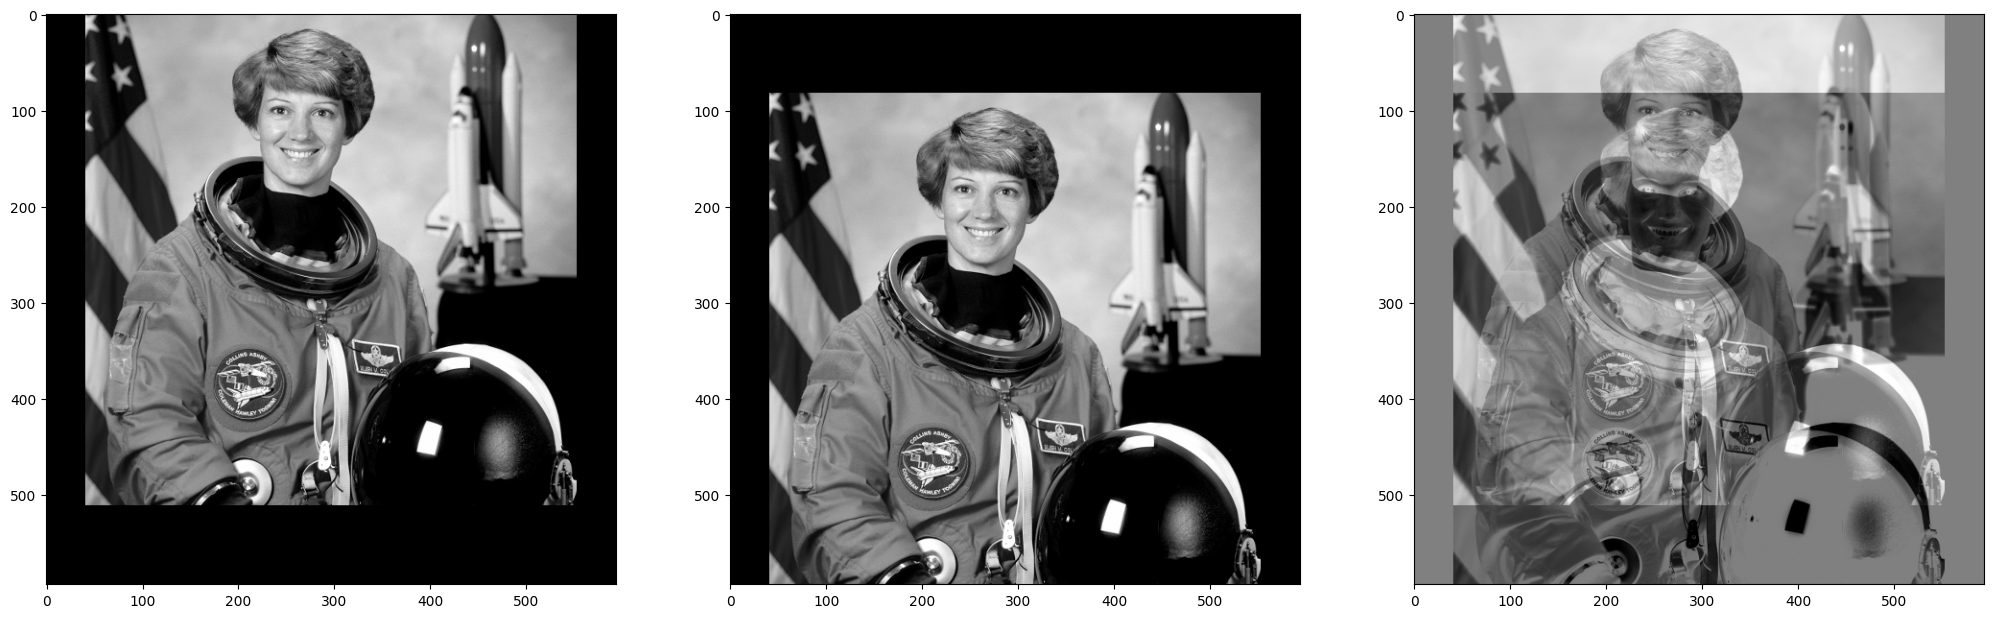

In [16]:
# Pour tester
img = color.rgb2gray(data.astronaut())
kernel = np.array([[0,1,0],[0,0,0],[0,0,0]])

conv = signal.convolve2d(img, kernel)
corr = signal.correlate2d(img, kernel)
for i in range(40):
    conv = signal.convolve2d(conv, kernel)
    corr = signal.correlate2d(corr, kernel)
diff = conv - corr 

_, ax = plt.subplots(1,3, figsize=(25,25))
ax[0].imshow(conv, cmap='grey')
ax[1].imshow(corr, cmap='grey')
ax[2].imshow(diff, cmap='grey')
plt.show()


## Exercice 6
Implémenter et appliquer un filtre médian afin de restorer l'image dans `img`.
> Compléter les sections TODO

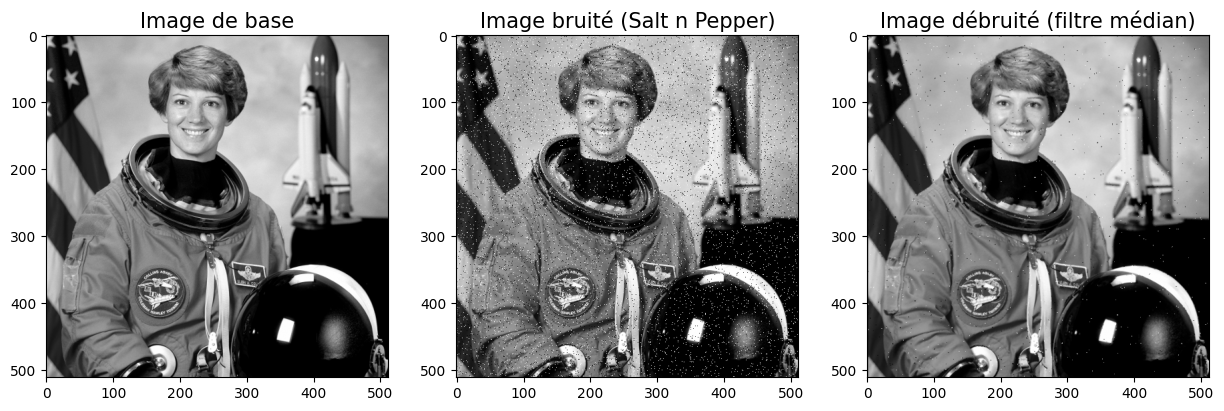

In [14]:
# Add salt and pepper noise
plt.figure(figsize=(15,15))

plt.subplot(131)
plt.title('Image de base', fontsize=15)

# Get image
img = color.rgb2gray(data.astronaut())

plt.imshow(img, cmap='gray')

plt.subplot(132)
plt.title('Image bruité (Salt n Pepper)', fontsize=15)

# Add salt n pepper noise to img
nb_pixel = img.shape[0] * img.shape[1]
noise_p = 0.025

# salt
for i in range(round(nb_pixel * noise_p)):
    x = random.randint(0, img.shape[0]-1)
    y = random.randint(0, img.shape[1]-1)
    img[x, y] = 1

# pepper
for i in range(round(nb_pixel * noise_p)):
    x = random.randint(0, img.shape[0]-1)
    y = random.randint(0, img.shape[1]-1)
    img[x, y] = 0

plt.imshow(img, cmap='gray')

plt.subplot(133)
plt.title('Image débruité (filtre médian)', fontsize=15)

# Padding
padding = np.zeros((img.shape[0] + 2, img.shape[1] + 2))
padding[1:-1, 1:-1] = img

# Apply median filter on img using padding
for i in range(1, img.shape[0]):
    for j in range(1, img.shape[1]):
        values = padding[i-1:i+1, j-1:j+1]
        med = np.median(values)
        img[i,j] = med
    

plt.imshow(img, cmap='gray')

plt.show()

# Exercice 7
Quiz sur différent résultat de convolution?

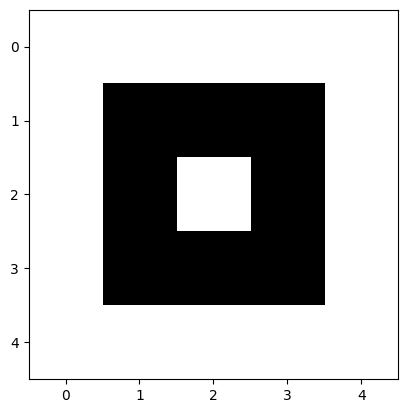

[[ 1  3  4  4  4  3  1]
 [ 1  2  1  0  1  2  1]
 [ 0 -1 -2 -2 -2 -1  0]
 [ 0  0  0  0  0  0  0]
 [ 0  1  2  2  2  1  0]
 [-1 -2 -1  0 -1 -2 -1]
 [-1 -3 -4 -4 -4 -3 -1]]
[[ 1  1  0  0  0 -1 -1]
 [ 3  2 -1  0  1 -2 -3]
 [ 4  1 -2  0  2 -1 -4]
 [ 4  0 -2  0  2  0 -4]
 [ 4  1 -2  0  2 -1 -4]
 [ 3  2 -1  0  1 -2 -3]
 [ 1  1  0  0  0 -1 -1]]


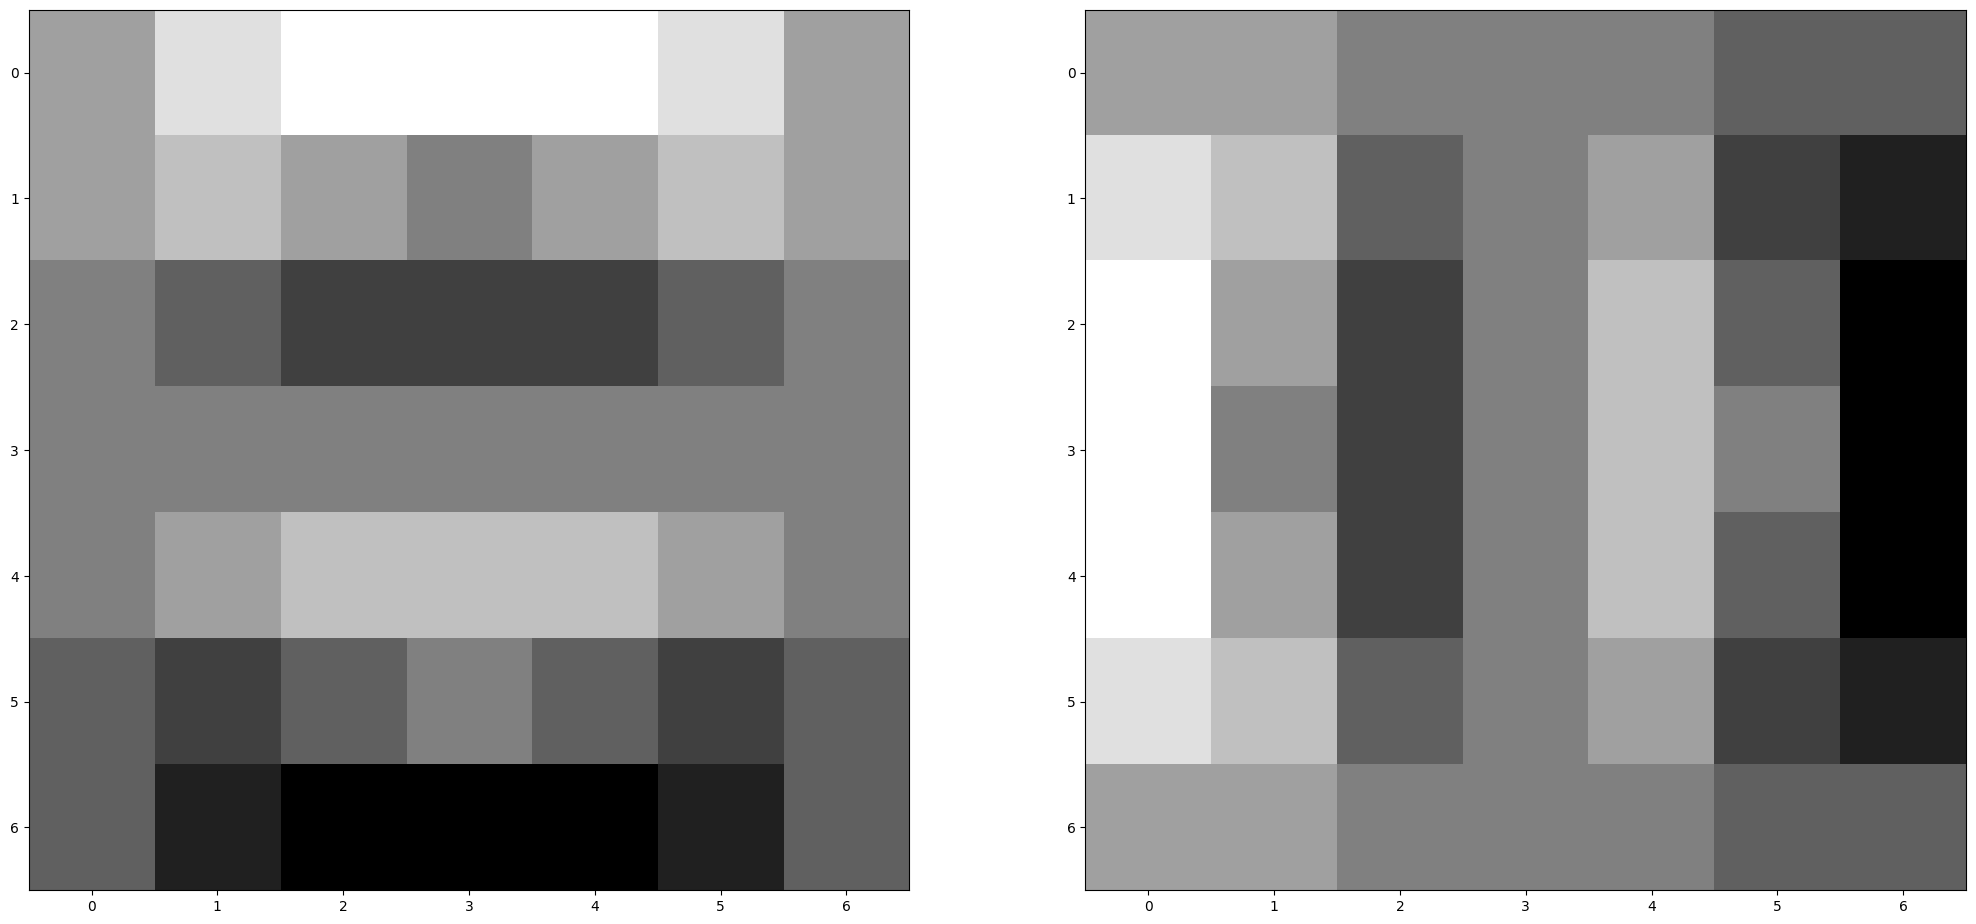

In [21]:
img = np.array([[1,1,1,1,1],[1,0,0,0,1],[1,0,1,0,1],[1,0,0,0,1],[1,1,1,1,1]])

plt.imshow(img, cmap="grey")
plt.show()

kernel_a = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
kernel_b = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])


kernel_a_img = signal.convolve2d( kernel_a, img)
kernel_b_img = signal.convolve2d( kernel_b, img)

print(kernel_a_img)
print(kernel_b_img)
_, ax = plt.subplots(1,2,figsize=(25,25))
ax[0].imshow(kernel_a_img, cmap="grey")
ax[1].imshow(kernel_b_img, cmap="grey")
plt.show()

## Extra
Pour ceux qui on de la misère à comprendre comment et pourquoi faire de l'égalisation d'histogramme:
- [Comment: vidéo youtube](https://www.youtube.com/watch?v=PD5d7EKYLcA)
- [Exemple/Pourquoi: notebook sur Github](https://github.com/MubashirullahD/diplab06/blob/master/Histogram%20Equalization.ipynb)